# Testing cli-regridder files inclusion in the catalogue

The low resolution data obtained and saved with the method introduced in the `regridder.py` file are added to the intake catalogue and tested in this notebook.

This can be useful for some diagnostics that require temporal binned data or lower resolutions (e.g. for time series) and would take too long to be computed with the full resolution data on the fly with the `intake` methods.


In [1]:
import sys

sys.path.insert(1, '/work/bb1153/b382289/AQUA/')
from aqua import Reader
from aqua.reader import catalogue

First it's possible to see that the low resolution archive from IFS data appears in the catalogue under the correct IFS experiment as `lra_r100` (monthly binned):

In [2]:
configdir = '/work/bb1153/b382289/AQUA/config'
catalogue(configdir=configdir);

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	
	- interpolated_global	
	- interpolated_np	
	- interpolated_sp	
	- interpolated_sp_ci	
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	
	- interpolated_global	
	- interpolated_np	
	- interpolated_sp	
	- lra_r100	
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	

FESOM	tco3999-ng5	2.5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- np	nearest-neighbor interpolation to lat-lon grid
	- interpolated_global2d	
	- interpolated_global_TS	
	- interpolated_global_UV	
	- interpolated_np	
	- interpolated_sp	
	- original_2d	original 2d output
	- original_3d	original 3d output
FESOM	tco2559-ng5	5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- interpolated_global2d	
	- interpolated_global_TS	
	- interpolated_global_UV	
	- interpolated_np	
	- interpolated_sp	
	- ori

In [3]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="lra_r100",
                configdir=configdir)
data = reader.retrieve(fix=False)

We can see the variables available in the data object:

In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360)
Coordinates:
  * time     (time) int64 0 29 60 90 121 151 182 213 243 274 304 335 366
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    tp       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>

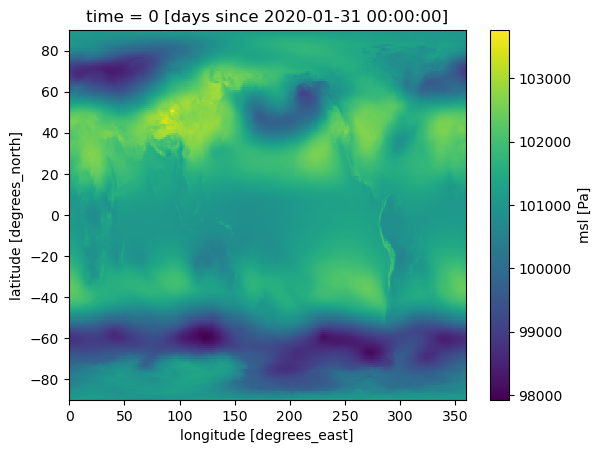

In [5]:
data['msl'][0,:,:].plot()

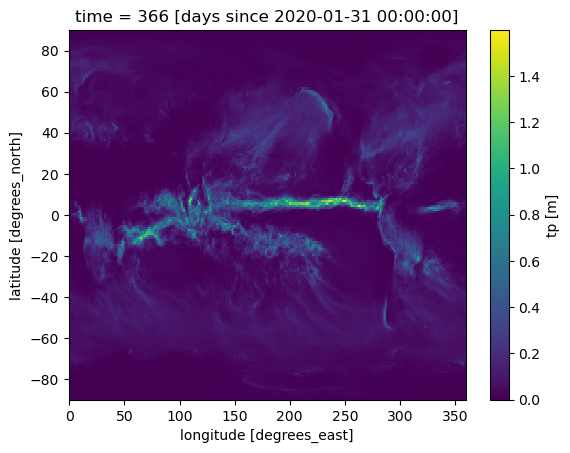

In [15]:
data['tp'][12,:,:].plot()